# Pymaceuticals Inc.
---

### Analysis

- By looking at the box plot, Capomulin and Ramicane shows much effective treatment results than (comparatively less Tumor Volume) than Infubinol and Ceftamine. Capomulin is slightly more effective than Ramicane
- The data set has only one outlier which is for Infubinol, so looks like more reliable data set to extract conclusion
- The correlation factor between weight of mouse and Avg Tumor Volume is nearly 1 which means highly correlated. Also scatter plot with line plotted shows lighter the mouse, treatment is highly effective
 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
%matplotlib inline

In [92]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemouse=mouse_study_df[mouse_study_df.duplicated(subset = ["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicatemouse

array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicatemouse)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df_clean=mouse_study_df[~mouse_study_df["Mouse ID"].isin(duplicatemouse)]
mouse_study_df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [96]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_df=mouse_study_df_clean.groupby('Drug Regimen')
pd.DataFrame({"Mean Tumor Volume":grouped_df["Tumor Volume (mm3)"].mean(),
              "Median Tumor Volume":grouped_df["Tumor Volume (mm3)"].median(),
              "Tumor Volume Variance":grouped_df["Tumor Volume (mm3)"].var(),
              "Tumor Volume Std. Dev.":grouped_df["Tumor Volume (mm3)"].std(),
              "Tumor Volume Std. Err.":grouped_df["Tumor Volume (mm3)"].sem()})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
grouped_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

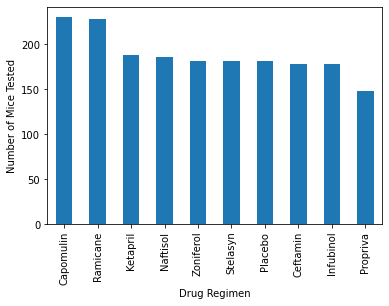

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_timepoint=mouse_study_df_clean["Drug Regimen"].value_counts()
mice_timepoint.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

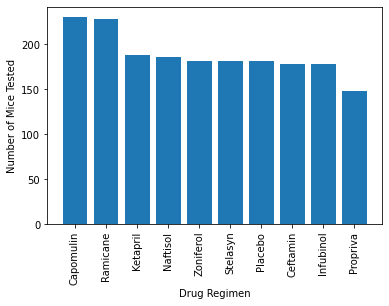

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mice_timepoint.index,mice_timepoint.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation='vertical')
plt.show()

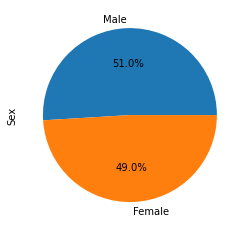

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df=mouse_study_df_clean["Sex"].value_counts()
sex_df.plot(kind="pie",autopct='%1.1f%%')
plt.show()

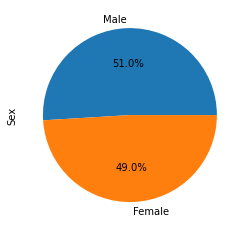

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=sex_df.index
sizes=sex_df.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp=mouse_study_df_clean.groupby('Mouse ID')["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tm_atlast_tp_df=pd.merge(last_tp,mouse_study_df_clean,how="left",on=("Mouse ID","Timepoint"))
tm_atlast_tp_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [164]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_values=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds

for index,treatment in enumerate(treatment):
    values = tm_atlast_tp_df.loc[tm_atlast_tp_df['Drug Regimen']==treatment]["Tumor Volume (mm3)"]
    drug_values.append(values)
    quartiles=drug_df[treatment].quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq - (1.5*iqr)
    upper_bound=upperq + (1.5*iqr)
    outlier_counts=(values.loc[(tm_atlast_tp_df['Tumor Volume (mm3)'] >= upper_bound) 
                               | (tm_atlast_tp_df['Tumor Volume (mm3)'] <= lower_bound)])
    print(f"{treatment} potential Outliers : {outlier_counts}")

Capomulin potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential Outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


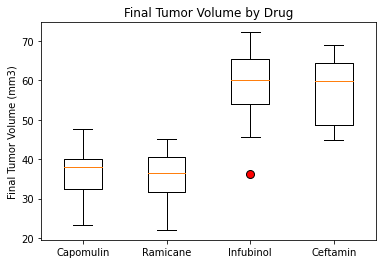

In [159]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(drug_values,flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

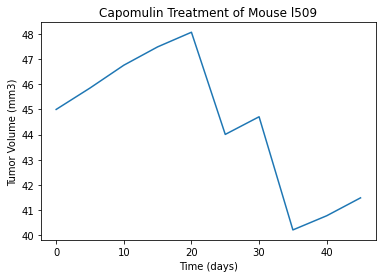

In [192]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df=mouse_study_df_clean.loc[mouse_study_df_clean["Mouse ID"]=="l509"]
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()


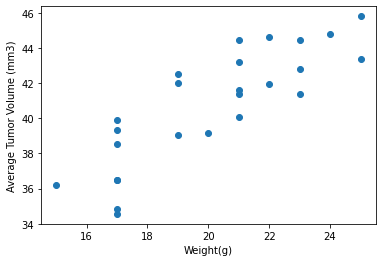

In [200]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#DataFrame for only Capomulin
capomulin_df = mouse_study_df_clean.loc[mouse_study_df_clean['Drug Regimen'] == 'Capomulin']
#Group DF to find average Tumor Volume for each Mouse ID
grouped_df=pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
grouped_df=grouped_df.rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
#merge with capomulin DF to get the weight of each mouse
avg_df=pd.merge(grouped_df,capomulin_df,on="Mouse ID",how="left")
final_df = avg_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
#plotting scatter plot
weight=final_df["Weight (g)"]
avgTumorVolume=final_df["avg_tumor_vol"]
plt.scatter(weight,avgTumorVolume)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and Average Tumor Volume is 0.84


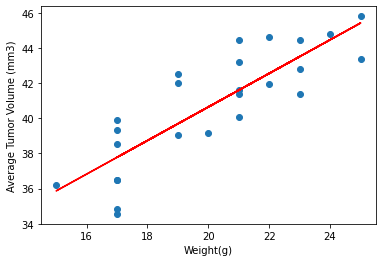

In [208]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,avgTumorVolume)
print(f"The correlation between mouse weight and Average Tumor Volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgTumorVolume)
regress_values=weight*slope+intercept
plt.scatter(weight,avgTumorVolume)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight,regress_values,"r-")
plt.show()